In [1]:
#installing packages
#%pip install imblearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

from imblearn.over_sampling import SMOTE
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

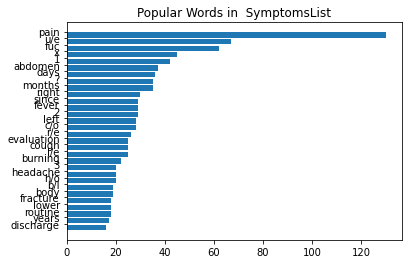

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords

topics_table = pd.read_csv("symptoms.csv")

topic_words = [ z.lower() for y in
                   [ x.split() for x in topics_table['Symptoms'] if isinstance(x, str)]
                   for z in y]
word_count_dict = dict(Counter(topic_words))
popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
plt.barh(range(30), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:30])])
plt.yticks([x + 0.5 for x in range(30)], reversed(popular_words_nonstop[0:30]))
plt.title("Popular Words in  SymptomsList")
plt.show()

In [3]:
topics_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   S No      1000 non-null   int64 
 1   Symptoms  999 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
print(topics_table.Symptoms.unique())


['CHRONIC ANAL FISSURE' 'PAIN ON DEFACATION' 'UNDER EVALUATION'
 'LEFT EAR PAIN' 'PAIN ABDOMEN' 'PALPITATIONS -EPISODIC X 10 DAYS'
 'HYPERTENSION' 'FOLLOW UP CASE OF FIBRO ADENOSIS' 'WITH LUMP'
 'B/L CYCLIC MASTALGIA' 'hearing loss under evaluation'
 'b/l reduced hearing sensitivity for 4 years'
 'fuc gall stone induced pancreatitis' 'symptomatically relieved'
 'LEFT EAR DISCHARGE' '?b/l renal calculi' 'b/l flank pain'
 'rt ureteric cal??' 'right flank pain' '? urinary tract infection'
 'burning micturition since 1 week' 'Dysuria x 1 week' 'cystitis' 'pain'
 'e/w/m case of fracture of left both bone forearm'
 'e/w/m case of fracture of left bothbone forearm' 'CONSTIPATION.'
 'fuco chronic constipation' 'POST OP CASE OF SUBTOTAL CHOLECYSTECTOMY'
 'FUC OF CHOLELITHIASIS WITH GB PERFORATION WITH T2DM' 'u/e'
 'pain abdomen under evaLUATION' 'pain abdomen gas acidity'
 'P/U/C OF UNMARRIED GIRL WITH SCANTY MENSES' 'NO ANY OTHER COMPLAINTS'
 'UMARRIED GIRL WITH SCANTY MENSES' '?LIVER ABCESS'


In [6]:
topics_table.head(20)

,S No,Symptoms
0,1,CHRONIC ANAL FISSURE
1,2,PAIN ON DEFACATION
2,3,UNDER EVALUATION
3,4,LEFT EAR PAIN
4,5,UNDER EVALUATION
5,6,PAIN ABDOMEN
6,7,PALPITATIONS -EPISODIC X 10 DAYS
7,8,HYPERTENSION
8,9,FOLLOW UP CASE OF FIBRO ADENOSIS
9,10,WITH LUMP


In [7]:
new_symptoms_data = pd.read_csv("mtsamples.csv")
#new_symptoms_data = pd.read_csv("symptoms.csv")

In [8]:
new_symptoms_data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [9]:
def get_sentence_word_count(text_list):
    sent_count = 0
    word_count = 0
    vocab = {}
    for text in text_list:
        sentences=sent_tokenize(str(text).lower())
        sent_count = sent_count + len(sentences)
        for sentence in sentences:
            words=word_tokenize(sentence)
            for word in words:
                if(word in vocab.keys()):
                    vocab[word] = vocab[word] +1
                else:
                    vocab[word] =1 
    word_count = len(vocab.keys())
    return sent_count,word_count

In [10]:
new_symptoms_data = new_symptoms_data[new_symptoms_data['sample_name'].notna()]
sent_count,word_count= get_sentence_word_count(new_symptoms_data['sample_name'].tolist())
print("Number of sentences in Symptoms column: "+ str(sent_count))
print("Number of unique words in Symptoms column: "+str(word_count))



data_categories  = new_symptoms_data.groupby(new_symptoms_data['sample_name'])
i = 1
print('===========Original Categories =======================')
for catName,dataCategory in data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1
print('==================================')

Number of sentences in Symptoms column: 4999
Number of unique words in Symptoms column: 1789
===========Original Categories =======================
Cat:1  1-year-old Exam - H&P  : 1
Cat:2  2-D Doppler  : 2
Cat:3  2-D Echocardiogram - 1  : 2
Cat:4  2-D Echocardiogram - 2  : 2
Cat:5  2-D Echocardiogram - 3  : 2
Cat:6  2-D Echocardiogram - 4  : 2
Cat:7  3-Dimensional Simulation  : 2
Cat:8  A 5-month-old boy with cough  : 2
Cat:9  AC Separation Revision & Hardware Removal  : 2
Cat:10  AV Fistula - 1  : 2
Cat:11  AV Fistula - 2  : 2
Cat:12  AV Fistula - 3  : 2
Cat:13  AV Fistula - 4  : 2
Cat:14  AV Fistula - 5  : 2
Cat:15  AVM with Hemorrhage  : 2
Cat:16  Abdominal Abscess I&D  : 2
Cat:17  Abdominal Exploration  : 2
Cat:18  Abdominal Pain - Consult  : 4
Cat:19  Abdominosacrocolpopexy  : 2
Cat:20  Abnormal Cholesterol Result - Letter  : 1
Cat:21  Abnormal Echocardiogram  : 2
Cat:22  Abnormal Stress Test  : 3
Cat:23  Abrasions & Lacerations - ER Visit  : 2
Cat:24  Abscess Excision  : 2
Cat:25

In [1]:
import spacy

sp = spacy.load('en_core_web_sm')
sen = sp(u'yellowish discolouration of eyes')

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#%pip install pytextrank

In [12]:
import pytextrank

# example text
text = "Had fallen off the bike, bone is broken, surgery has to be done, MRI has to be done"

#text = 'Fever is coming, there is a pain in the head, there is a pain in the ear'

#text = 'Dry COUGH 1.5 MONTHS CHEST PAIN ON COUGHING and fever, Weight LOSS'

# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")

# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")
doc = nlp(text)

# examine the top-ranked phrases in the document
for phrase in doc._.phrases:
    print(phrase.text)
    print(phrase.rank, phrase.count)
    print(phrase.chunks)

MRI
0.22023242777127947 1
[MRI]
surgery
0.10670694396086693 1
[surgery]
bone
0.0878638269331204 1
[bone]
the bike
0.035823642100341134 1
[the bike]


In [9]:
#Noun word extraction
for noun_chunk in doc.noun_chunks:
    print(noun_chunk.text)

Dry COUGH
1.5 MONTHS CHEST
ON
COUGHING
fever Weight LOSS


In [12]:
print(sen.ents)


()


In [ ]:
def wordCloudFunction(df,column,numWords):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
plt.figure(figsize=(15,15))
wordCloudFunction(new_symptoms_data,'Symptoms',10000000)

NameError: name 'WordCloud' is not defined

<Figure size 1080x1080 with 0 Axes>

In [ ]:
new_symptoms_data = new_symptoms_data[new_symptoms_data['description'].notna()]
sent_count,word_count= get_sentence_word_count(new_symptoms_data['description'].tolist())
print("Number of sentences in description column: "+ str(sent_count))
print("Number of unique words in description column: "+str(word_count))



data_categories  = new_symptoms_data.groupby(new_symptoms_data['medical_specialty'])
i = 1
print('===========Original Categories =======================')
for catName,dataCategory in data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1
print('==================================')

KeyError: 'description'

In [35]:
dataset = pd.read_csv("dataset.csv")

In [36]:
dataset.head(-20)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,Chicken pox,itching,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body,NaN,NaN,NaN,NaN,NaN,NaN
4896,Dengue,skin_rash,chills,joint_pain,vomiting,fatigue,high_fever,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,malaise,muscle_pain,red_spots_over_body,NaN,NaN,NaN
4897,Typhoid,chills,vomiting,fatigue,high_fever,headache,nausea,constipation,abdominal_pain,diarrhoea,toxic_look_(typhos),belly_pain,NaN,NaN,NaN,NaN,NaN,NaN
4898,hepatitis A,joint_pain,vomiting,yellowish_skin,dark_urine,nausea,loss_of_appetite,abdominal_pain,diarrhoea,mild_fever,yellowing_of_eyes,muscle_pain,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
disease = dataset['Disease'].unique().tolist()
#disease = disease.sort()
print(disease)

['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine', 'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia', 'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo']


In [52]:
symptoms = pd.read_csv('symptoms.csv')

In [53]:
symptoms.head()

,S No,Symptoms
0,1,CHRONIC ANAL FISSURE
1,2,PAIN ON DEFACATION
2,3,UNDER EVALUATION
3,4,LEFT EAR PAIN
4,5,UNDER EVALUATION


In [55]:
#change in lower case
symptoms['Symptoms']=symptoms['Symptoms'].astype(str)
symptoms["Symptoms"] = symptoms['Symptoms'].apply(lambda x:x.lower())
symptoms

,S No,Symptoms
0,1,chronic anal fissure
1,2,pain on defacation
2,3,under evaluation
3,4,left ear pain
4,5,under evaluation
...,...,...
995,996,pain in lower back x 1 year
996,997,sacroilitis left
997,998,ulcer
998,999,uljhan ghabrahat x 2months neend na aana x 3days


In [57]:
#checking for disease
def checking_disease(symptoms_plus_disease):
    disease = symptoms_plus_disease
    tokens = nltk.word_tokenize(disease)
    diseases_list = ['fever', 'achondroplasia']
    if disease in diseases_list:
        return disease
    else:
        return "Not Found"
    



disease = checking_disease('fever -3days')
print(disease)

Not Found


In [ ]:
#checking  body part
def body_organ(symptoms_plus_disease):
    body_organ = symptoms_plus_disease
    body_organ_list = []
    if body_organ in body_organ_list:
        return body_organ
    else:
        return "Not Found any body organ"

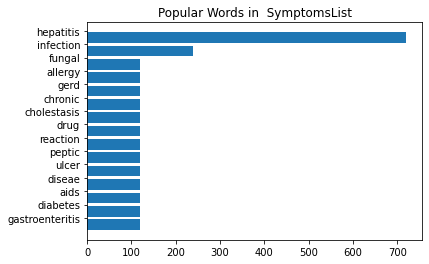

In [28]:
dataset = [ z.lower() for y in
                   [ x.split() for x in dataset['Disease'] if isinstance(x, str)]
                   for z in y]
word_count_dict = dict(Counter(dataset))
popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
plt.barh(range(15), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:15])])
plt.yticks([x + 0.5 for x in range(15)], reversed(popular_words_nonstop[0:15]))
plt.title("Popular Words in  SymptomsList")
plt.show()

In [33]:
dataset['Disease'].unique()

TypeError: list indices must be integers or slices, not str

In [ ]:
## lets basic import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.utils import shuffle

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score

# from pandas_profiling import ProfileReport

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [ ]:
#%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
df = pd.read_csv('dataset.csv')
df = shuffle(df, random_state = 42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## remove ('_') underscore in the text

for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')
    
df.head(30)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,Hypertension,headache,chest pain,dizziness,loss of balance,lack of concentration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575,Hypoglycemia,vomiting,fatigue,anxiety,sweating,headache,nausea,blurred and distorted vision,excessive hunger,drying and tingling lips,slurred speech,irritability,palpitations,NaN,NaN,NaN,NaN,NaN
765,Arthritis,muscle weakness,stiff neck,swelling joints,painful walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3751,Hepatitis B,itching,fatigue,lethargy,yellowish skin,dark urine,loss of appetite,abdominal pain,yellow urine,yellowing of eyes,malaise,receiving blood transfusion,receiving unsterile injections,NaN,NaN,NaN,NaN,NaN
4193,Migraine,acidity,indigestion,headache,blurred and distorted vision,excessive hunger,stiff neck,depression,irritability,visual disturbances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## charactieristics of data

df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [ ]:
## check null values

null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


In [ ]:
cols = df.columns

data = df[cols].values.flatten()

reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)

df = pd.DataFrame(reshaped, columns = df.columns)
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Hypertension,headache,chest pain,dizziness,loss of balance,lack of concentration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Hypoglycemia,vomiting,fatigue,anxiety,sweating,headache,nausea,blurred and distorted vision,excessive hunger,drying and tingling lips,slurred speech,irritability,palpitations,NaN,NaN,NaN,NaN,NaN
7,Arthritis,muscle weakness,stiff neck,swelling joints,painful walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Hepatitis B,itching,fatigue,lethargy,yellowish skin,dark urine,loss of appetite,abdominal pain,yellow urine,yellowing of eyes,malaise,receiving blood transfusion,receiving unsterile injections,NaN,NaN,NaN,NaN,NaN
9,Migraine,acidity,indigestion,headache,blurred and distorted vision,excessive hunger,stiff neck,depression,irritability,visual disturbances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## lets fill nan values

df = df.fillna(0)
df.head()

NameError: name 'df' is not defined

In [ ]:
## lets explore symptom severity

# df_severity = pd.read_csv('symptoms.csv')
# df_severity['symptom'] = df_severity['symptom'].str.replace('_',' ')
# df_severity.head(10)

In [ ]:
df['Disease']

NameError: name 'df' is not defined